In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df1 = pd.read_csv('./rankings_avg_stats.csv')
df1.head()

,RK,TIERS,PLAYER NAME,TEAM,FAN PTS,YDS,TDS,REC,YDS.1,TDS.1,ATT,YDS.2,TDS.2
0,1,1,Josh Allen,BUF,24.6,259.2,2.1,0.0,0.0,0.0,7.2,44.9,0.4
1,2,1,Christian McCaffrey,CAR,18.2,0.0,0.0,5.3,49.0,0.1,14.1,63.1,0.1
2,3,1,Jonathan Taylor,IND,21.9,0.0,0.0,2.4,21.2,0.1,19.5,106.5,1.1
3,4,1,Austin Ekeler,LAC,21.5,0.0,0.0,4.4,40.4,0.5,12.9,56.9,0.8
4,5,2,Justin Herbert,LAC,23.3,294.9,2.2,0.0,0.0,0.0,3.7,17.8,0.2


In [27]:
df2 = pd.read_csv('./rankings_rank.csv')
df2.head()

,RK,TIERS,PLAYER NAME,TEAM,POS,BEST,WORST,AVG.,STD.DEV,ECR VS. ADP
0,1,1,Josh Allen,BUF,QB1,1,7,2.1,0.6,-
1,2,1,Christian McCaffrey,CAR,RB1,1,10,2.3,2.3,-
2,3,1,Jonathan Taylor,IND,RB2,1,6,3.7,1.4,-
3,4,1,Austin Ekeler,LAC,RB3,1,22,5.6,2.6,-
4,5,2,Justin Herbert,LAC,QB2,2,27,6.8,4.8,-


In [28]:
df = df1.merge(df2, on='PLAYER NAME').drop(columns=['RK_y', 'TIERS_y', 'TEAM_y']).rename(columns={'RK_x':'RK', 'TIERS_x':'TIERS', 'TEAM_x':'TEAM'})

In [30]:
positions = []
position_ranks = []
for r in range(df.shape[0]):
    pos = df.loc[r].POS
    positions.append(pos.strip('0123456789'))
    position_ranks.append(pos.strip('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
    
    
df['POSITION'] = positions
df['POSITION RANK'] = position_ranks
df.head()

,RK,TIERS,PLAYER NAME,TEAM,FAN PTS,YDS,TDS,REC,YDS.1,TDS.1,...,YDS.2,TDS.2,POS,BEST,WORST,AVG.,STD.DEV,ECR VS. ADP,POSITION,POSITION RANK
0,1,1,Josh Allen,BUF,24.6,259.2,2.1,0.0,0.0,0.0,...,44.9,0.4,QB1,1,7,2.1,0.6,-,QB,1
1,2,1,Christian McCaffrey,CAR,18.2,0.0,0.0,5.3,49.0,0.1,...,63.1,0.1,RB1,1,10,2.3,2.3,-,RB,1
2,3,1,Jonathan Taylor,IND,21.9,0.0,0.0,2.4,21.2,0.1,...,106.5,1.1,RB2,1,6,3.7,1.4,-,RB,2
3,4,1,Austin Ekeler,LAC,21.5,0.0,0.0,4.4,40.4,0.5,...,56.9,0.8,RB3,1,22,5.6,2.6,-,RB,3
4,5,2,Justin Herbert,LAC,23.3,294.9,2.2,0.0,0.0,0.0,...,17.8,0.2,QB2,2,27,6.8,4.8,-,QB,2


In [63]:
QBs = df[df.POSITION == 'QB']
RBs = df[df.POSITION == 'RB']
WRs = df[df.POSITION == 'WR']
TEs = df[df.POSITION == 'TE']

In [152]:
def plot_distributions(df, label, top=10, size=1000, bins=100, alpha=0.5, color=None):
    dist = np.random.normal(loc=df.head(top)['FAN PTS'].mean(), scale=df.head(top)['FAN PTS'].std(), size=size)
    if color is not None:
        plt.hist(dist, bins=bins, alpha=alpha, label=label, color=color)
        plt.axvline(dist.mean(), ls='dashed', c=color)
    else:
        plt.hist(dist, bins=bins, alpha=alpha, label=label)
        plt.axvline(dist.mean(), ls='dashed', c='k')
    

def compare_top(df, pos, size=int(1e6)):
    df_sorted = df.sort_values('FAN PTS', ascending=False)
    
    print('Comparison of Top {}:\t\t mean \t std'.format(pos))
    print('\t top 10: \t\t{:>.2f}\t{:>.2f}'.format(df.head(10)['FAN PTS'].mean(), df.head(10)['FAN PTS'].std()))
    print('\t top 15: \t\t{:>.2f}\t{:>.2f}'.format(df.head(15)['FAN PTS'].mean(), df.head(15)['FAN PTS'].std()))
    print('\t top 20: \t\t{:>.2f}\t{:>.2f}'.format(df.head(20)['FAN PTS'].mean(), df.head(20)['FAN PTS'].std()))
    print('\t top 10 sorted: \t{:>.2f}\t{:>.2f}'.format(df_sorted.head(10)['FAN PTS'].mean(), df_sorted.head(10)['FAN PTS'].std()))
    print('\t top 15 sorted: \t{:>.2f}\t{:>.2f}'.format(df_sorted.head(15)['FAN PTS'].mean(), df_sorted.head(15)['FAN PTS'].std()))
    print('\t top 20 sorted: \t{:>.2f}\t{:>.2f}'.format(df_sorted.head(20)['FAN PTS'].mean(), df_sorted.head(20)['FAN PTS'].std()))
    print('\t all: \t\t\t{:>.2f}\t{:>.2f}\n'.format(df['FAN PTS'].mean(), df['FAN PTS'].std()))
    
    htype = 'bar'
    alpha = 0.5
    bins = 100

    fig = plt.figure(figsize=(12,8))

    plot_distributions(df, 'top 10', top=10, size=size, bins=bins, alpha=alpha, color='blue')
    plot_distributions(df, 'top 15', top=15, size=size, bins=bins, alpha=alpha, color='red')
    plot_distributions(df, 'top 20', top=20, size=size, bins=bins, alpha=alpha, color='green')
#     plot_distributions(df_sorted, 'top 10 sorted', top=10, size=size, bins=bins, alpha=alpha)
#     plot_distributions(df_sorted, 'top 15 sorted', top=10, size=size, bins=bins, alpha=alpha)
#     plot_distributions(df_sorted, 'top 20 sorted', top=10, size=size, bins=bins, alpha=alpha)
#     plot_distributions(df, 'all', top=500, size=size, bins=bins, alpha=alpha)

    plt.ylabel('samples')
    plt.xlabel('fantasy points')
    plt.title(pos)
    plt.legend();

Comparison of Top QBs:		 mean 	 std
	 top 10: 		21.63	1.84
	 top 15: 		20.27	3.30
	 top 20: 		18.70	4.11
	 top 10 sorted: 	21.96	1.29
	 top 15 sorted: 	20.72	2.25
	 top 20 sorted: 	19.46	2.96
	 all: 			13.37	6.91

Comparison of Top RBs:		 mean 	 std
	 top 10: 		18.22	3.78
	 top 15: 		17.37	3.51
	 top 20: 		14.57	6.77
	 top 10 sorted: 	19.12	2.53
	 top 15 sorted: 	17.85	2.77
	 top 20 sorted: 	16.93	2.89
	 all: 			5.61	5.69

Comparison of Top WRs:		 mean 	 std
	 top 10: 		18.72	3.35
	 top 15: 		17.46	3.35
	 top 20: 		16.43	3.64
	 top 10 sorted: 	19.18	2.92
	 top 15 sorted: 	18.05	2.87
	 top 20 sorted: 	17.33	2.78
	 all: 			6.51	5.49

Comparison of Top TEs:		 mean 	 std
	 top 10: 		12.62	2.67
	 top 15: 		10.95	4.04
	 top 20: 		10.22	3.80
	 top 10 sorted: 	12.79	2.49
	 top 15 sorted: 	11.93	2.37
	 top 20 sorted: 	11.14	2.49
	 all: 			4.76	4.04



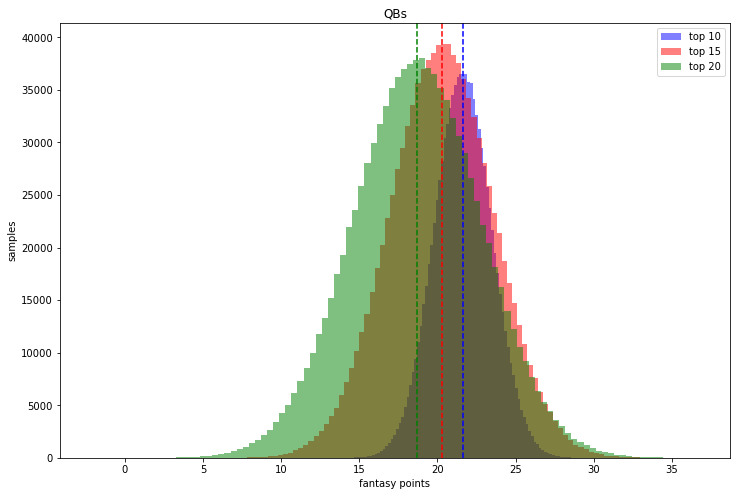

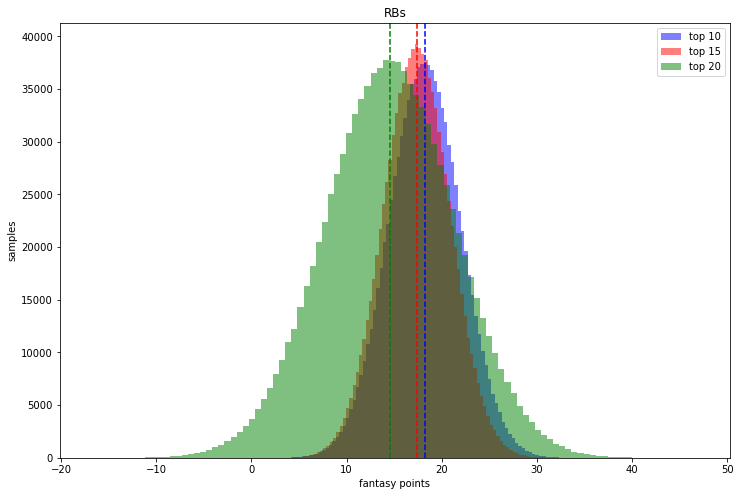

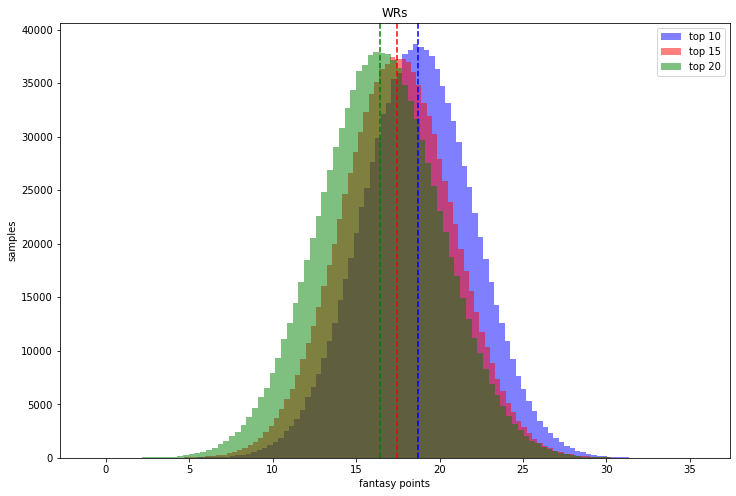

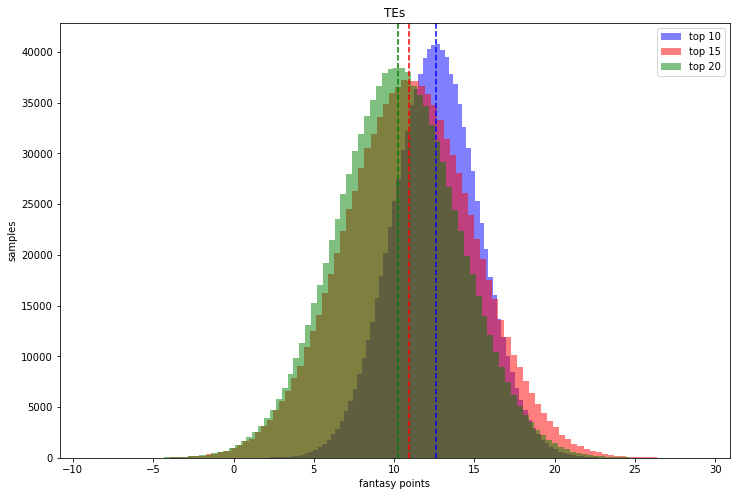

In [153]:
compare_top(QBs, 'QBs')
compare_top(RBs, 'RBs')
compare_top(WRs, 'WRs')
compare_top(TEs, 'TEs')